In [7]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='8e1cefbb-b8f2-4973-80a8-eedbb2a13f9f', project_access_token='p-532af005a676d297d9302b2dbf588fd34a60eded')
pc = project.project_context


# *Segment 1 * 

Filtering & Selecting Data

add Codeadd Markdown
Selecting and retrieving data

you can write and index value in two ways

In [8]:
!pip install pandas
!pip install numpy

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import Series, DataFrame

In [9]:
np.random.seed(25)
DF_obj= pd.DataFrame(np.random.rand(36).reshape((6,6)),
index=['Row 1','Row 2','Row 3','Row 4','Row 5','Row 6'],
columns= ['Column 1','Column 2','Column 3','Column 4','Column 5','Column 6'])
print(DF_obj)

       Column 1  Column 2  Column 3  Column 4  Column 5  Column 6
Row 1  0.870124  0.582277  0.278839  0.185911  0.411100  0.117376
Row 2  0.684969  0.437611  0.556229  0.367080  0.402366  0.113041
Row 3  0.447031  0.585445  0.161985  0.520719  0.326051  0.699186
Row 4  0.366395  0.836375  0.481343  0.516502  0.383048  0.997541
Row 5  0.514244  0.559053  0.034450  0.719930  0.421004  0.436935
Row 6  0.281701  0.900274  0.669612  0.456069  0.289804  0.525819


In [10]:
DF_obj.loc[['Row 1', 'Row 6'], ['Column 1', 'Column 3']]

,Column 1,Column 3
Row 1,0.870124,0.278839
Row 6,0.281701,0.669612


Slicing
Slicing is the operation which allows you to extract portions of an array to generate new ones. Whereas 
using the Python lists the arrays obtained by slicing are copies, in NumPy, arrays are views onto the same 
underlying buffer.
Depending on the portion of the array that you want to extract (or view) you must make use of the slice 
syntax; that is, you will use a sequence of numbers separated by colons (‘:’) within the square brackets.

In [11]:
DF_obj['Row 1':'Row 5']

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
Row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
Row 2,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
Row 3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
Row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
Row 5,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935


# comparing with scalers
Scalers are just single numerical values,you can use comparison operators like '>' or '<' to return True/False values for all records to indicate how each element compares to the scaler value.

In [12]:
DF_obj <.2

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
Row 1,False,False,False,True,False,True
Row 2,False,False,False,False,False,True
Row 3,False,False,True,False,False,False
Row 4,False,False,False,False,False,False
Row 5,False,False,True,False,False,False
Row 6,False,False,False,False,False,False


In [13]:
series_obj= Series(np.arange(8), index=['Row 1','Row 2','Row 3','Row 4','Row 5','Row 6','Row 7','Row 8'])
series_obj

Row 1    0
Row 2    1
Row 3    2
Row 4    3
Row 5    4
Row 6    5
Row 7    6
Row 8    7
dtype: int64

# Filtering with scalers

In [14]:
series_obj[series_obj >5]

Row 7    6
Row 8    7
dtype: int64

# Setting Values With scalers

In [15]:
series_obj['Row 1','Row 3','Row 5']=8
series_obj

Row 1    8
Row 2    1
Row 3    8
Row 4    3
Row 5    8
Row 6    5
Row 7    6
Row 8    7
dtype: int64

# Chapter 2 - Data preparation Basics

# Segment2 : Dealing with missing values

# Figuring out what data is missing

In [16]:
missing = np.nan
series_obj= Series(['Row 1','Row 2',missing,'Row 4','Row 5','Row 6',missing,'Row 8'])
series_obj

0    Row 1
1    Row 2
2      NaN
3    Row 4
4    Row 5
5    Row 6
6      NaN
7    Row 8
dtype: object

In [17]:
series_obj.isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
dtype: bool

# Filtering with Missing Values

In [18]:
DF_obj.iloc[1:3, 0]= missing
DF_obj.iloc[3:6, 5]= missing
DF_obj

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
Row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
Row 2,NaN,0.437611,0.556229,0.367080,0.402366,0.113041
Row 3,NaN,0.585445,0.161985,0.520719,0.326051,0.699186
Row 4,0.366395,0.836375,0.481343,0.516502,0.383048,NaN
Row 5,0.514244,0.559053,0.034450,0.719930,0.421004,NaN
Row 6,0.281701,0.900274,0.669612,0.456069,0.289804,NaN


# Filling missed values with 0

In [19]:
filled_DF = DF_obj.fillna(0)
filled_DF

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
Row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
Row 2,0.000000,0.437611,0.556229,0.367080,0.402366,0.113041
Row 3,0.000000,0.585445,0.161985,0.520719,0.326051,0.699186
Row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.000000
Row 5,0.514244,0.559053,0.034450,0.719930,0.421004,0.000000
Row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.000000


In [20]:
filled_DF = DF_obj.fillna({0: .1, 5:1.25})
filled_DF

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
Row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
Row 2,NaN,0.437611,0.556229,0.367080,0.402366,0.113041
Row 3,NaN,0.585445,0.161985,0.520719,0.326051,0.699186
Row 4,0.366395,0.836375,0.481343,0.516502,0.383048,NaN
Row 5,0.514244,0.559053,0.034450,0.719930,0.421004,NaN
Row 6,0.281701,0.900274,0.669612,0.456069,0.289804,NaN


In [21]:
filled_DF = DF_obj.fillna(method= 'ffill')
filled_DF

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
Row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
Row 2,0.870124,0.437611,0.556229,0.367080,0.402366,0.113041
Row 3,0.870124,0.585445,0.161985,0.520719,0.326051,0.699186
Row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.699186
Row 5,0.514244,0.559053,0.034450,0.719930,0.421004,0.699186
Row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.699186


# Counting missing values

In [22]:
np.random.seed(25)
DF_obj= pd.DataFrame(np.random.rand(36).reshape((6,6)))
DF_obj.iloc[1:3, 0]= missing
DF_obj.iloc[3:6, 5]= missing
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,NaN,0.437611,0.556229,0.367080,0.402366,0.113041
2,NaN,0.585445,0.161985,0.520719,0.326051,0.699186
3,0.366395,0.836375,0.481343,0.516502,0.383048,NaN
4,0.514244,0.559053,0.034450,0.719930,0.421004,NaN
5,0.281701,0.900274,0.669612,0.456069,0.289804,NaN


In [23]:
DF_obj.isnull().sum()

0    2
1    0
2    0
3    0
4    0
5    3
dtype: int64

# Filtering out missing values

In [24]:
DF_no_NAN = DF_obj.dropna()
DF_no_NAN

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.4111,0.117376


In [25]:
DF_no_NAN = DF_obj.dropna(axis=1)
DF_no_NAN

,1,2,3,4
0,0.582277,0.278839,0.185911,0.411100
1,0.437611,0.556229,0.367080,0.402366
2,0.585445,0.161985,0.520719,0.326051
3,0.836375,0.481343,0.516502,0.383048
4,0.559053,0.034450,0.719930,0.421004
5,0.900274,0.669612,0.456069,0.289804


# Removing Duplicates

In [26]:
df_obj=DataFrame({'column 1':[1,1,2,2,3,3,3],
                 'column 2': ['a','a','b','b','c','c','c'],
                 'column 3': ['A','A','B','B','C','C','C']})
df_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,C
6,3,c,C


In [27]:
df_obj.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool

In [28]:
df_obj.drop_duplicates()

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C


In [29]:
df_obj=DataFrame({'column 1':[1,1,2,2,3,3,3],
                 'column 2': ['a','a','b','b','c','c','c'],
                 'column 3': ['A','A','B','B','C','D','C']})
df_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,D
6,3,c,C


In [30]:
df_obj.drop_duplicates(['column 3'])

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C
5,3,c,D


# Segment 4 : Concatenation & Transformation 

In [31]:
DF_obj= pd.DataFrame(np.random.rand(36).reshape((6,6)))
DF_obj

,0,1,2,3,4,5
0,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044
3,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219
4,0.396542,0.825139,0.712552,0.097937,0.842154,0.440821
5,0.373989,0.913676,0.547778,0.251937,0.027474,0.206257


In [32]:
DF_obj2= pd.DataFrame(np.random.rand(15).reshape((5,3)))
DF_obj2

,0,1,2
0,0.590885,0.163652,0.836928
1,0.775203,0.169041,0.766994
2,0.335366,0.472398,0.215064
3,0.912094,0.759208,0.676561
4,0.021376,0.660874,0.094440


# Concatenating data

In [33]:
pd.concat([DF_obj, DF_obj2], axis=1)

,0,1,2,3,4,5,0,1,2
0,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862,0.590885,0.163652,0.836928
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376,0.775203,0.169041,0.766994
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044,0.335366,0.472398,0.215064
3,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219,0.912094,0.759208,0.676561
4,0.396542,0.825139,0.712552,0.097937,0.842154,0.440821,0.021376,0.660874,0.094440
5,0.373989,0.913676,0.547778,0.251937,0.027474,0.206257,NaN,NaN,NaN


In [34]:
pd.concat([DF_obj, DF_obj2])

,0,1,2,3,4,5
0,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044
3,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219
4,0.396542,0.825139,0.712552,0.097937,0.842154,0.440821
5,0.373989,0.913676,0.547778,0.251937,0.027474,0.206257
0,0.590885,0.163652,0.836928,NaN,NaN,NaN
1,0.775203,0.169041,0.766994,NaN,NaN,NaN
2,0.335366,0.472398,0.215064,NaN,NaN,NaN
3,0.912094,0.759208,0.676561,NaN,NaN,NaN


# Transforming data

# Dropping Data

In [35]:
DF_obj.drop([0, 3], axis=1)

,1,2,4,5
0,0.745284,0.828346,0.077140,0.644862
1,0.524254,0.958092,0.295432,0.512376
2,0.641717,0.132421,0.076742,0.331044
3,0.509213,0.655146,0.719055,0.415219
4,0.825139,0.712552,0.842154,0.440821
5,0.913676,0.547778,0.027474,0.206257


In [36]:
DF_obj.drop([0, 3])

,0,1,2,3,4,5
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044
4,0.396542,0.825139,0.712552,0.097937,0.842154,0.440821
5,0.373989,0.913676,0.547778,0.251937,0.027474,0.206257


# Adding Data

In [37]:
series_obj = Series(np.arange(6))
series_obj.name='added variable'
series_obj

0    0
1    1
2    2
3    3
4    4
5    5
Name: added variable, dtype: int64

# A- Adding data using join method

In [38]:
variable_added = DataFrame.join(DF_obj, series_obj)
variable_added

,0,1,2,3,4,5,added variable
0,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862,0
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376,1
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044,2
3,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219,3
4,0.396542,0.825139,0.712552,0.097937,0.842154,0.440821,4
5,0.373989,0.913676,0.547778,0.251937,0.027474,0.206257,5


# B- Adding data using append method

In [39]:
added_table = variable_added.append(variable_added, ignore_index=False)
added_table

,0,1,2,3,4,5,added variable
0,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862,0
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376,1
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044,2
3,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219,3
4,0.396542,0.825139,0.712552,0.097937,0.842154,0.440821,4
5,0.373989,0.913676,0.547778,0.251937,0.027474,0.206257,5
0,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862,0
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376,1
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044,2
3,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219,3


In [40]:
added_table = variable_added.append(variable_added, ignore_index=True)
added_table

,0,1,2,3,4,5,added variable
0,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862,0
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376,1
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044,2
3,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219,3
4,0.396542,0.825139,0.712552,0.097937,0.842154,0.440821,4
5,0.373989,0.913676,0.547778,0.251937,0.027474,0.206257,5
6,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862,0
7,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376,1
8,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044,2
9,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219,3


# Sorting Data

In [41]:
DF_Sorted =DF_obj.sort_values(by=(5), ascending=[False])
DF_Sorted

,0,1,2,3,4,5
0,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376
4,0.396542,0.825139,0.712552,0.097937,0.842154,0.440821
3,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044
5,0.373989,0.913676,0.547778,0.251937,0.027474,0.206257


# Grouping Data

In [42]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_4f7e83f78fe941f582ab8926478b6e64 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_4f7e83f78fe941f582ab8926478b6e64 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_4f7e83f78fe941f582ab8926478b6e64 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='CS9V8TY_G0IfZ5DKtcF9yJGVnelD4o7QpMVU8W8J1YaH',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_4f7e83f78fe941f582ab8926478b6e64)

body = client_4f7e83f78fe941f582ab8926478b6e64.get_object(Bucket='pythonbasicsfordatascienceproject-donotdelete-pr-6iigaprtj6zcbj',Key='mtcars.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
cars= pd.read_csv(body)
cars.head()
cars.columns=['Car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars_groups=cars.groupby('Car_names')[['vs','am']].mean()
cars_groups.mean()

vs    0.43750
am    0.40625
dtype: float64

# Chapter 4 : Practical data visualization

# Segment 1 : Creating standard data graphics

In [43]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# * Creating a line chart from a list object

# plotting a line chart in matplotlib

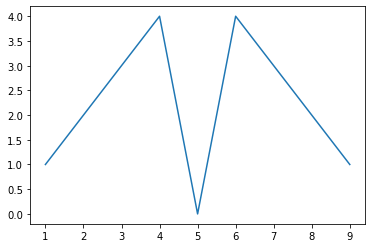

In [44]:
x=range(1,10)
y=[1,2,3,4,0,4,3,2,1]

plt.plot(x,y)

# plotting a line chart from a pandas object

<AxesSubplot:>

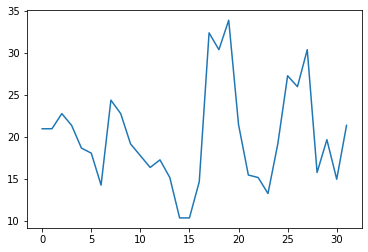

In [45]:
cars['mpg'].plot()

<AxesSubplot:>

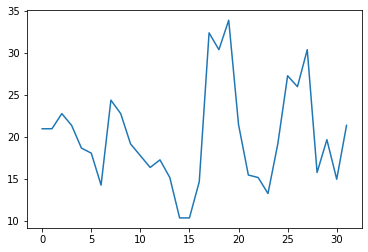

In [46]:
#or 
mpg= cars['mpg']
mpg.plot()

<AxesSubplot:>

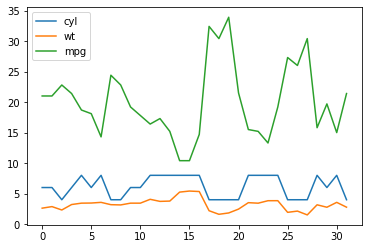

In [47]:
df=cars[['cyl','wt','mpg']]
df.plot()

# * Creating a bar charts

# Creating a bar chart from list

<BarContainer object of 9 artists>

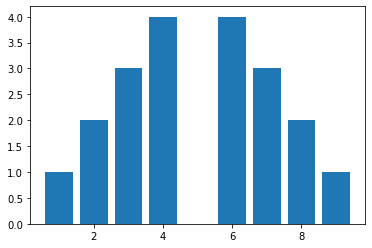

In [48]:
plt.bar(x,y)

# Creating a bar chart from a pandas object

<AxesSubplot:>

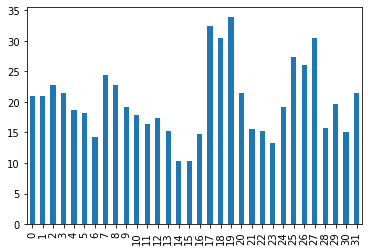

In [49]:
mpg.plot(kind= 'bar')

<AxesSubplot:>

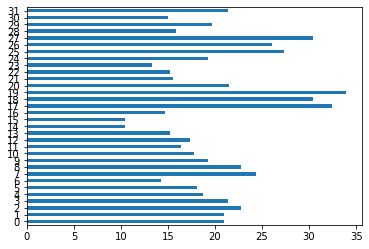

In [50]:
mpg.plot(kind= 'barh')

# Creating a bar chart 

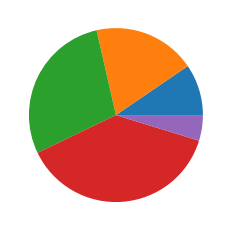

In [51]:
x=[1,2,3,4,0.5]
plt.pie(x)
plt.show()

# Saving a plot

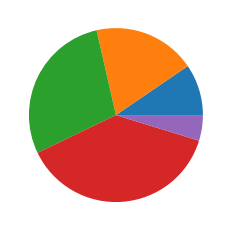

In [52]:
plt.pie(x)
plt.savefig('pie chart.png')
plt.show()

# To know the place where the image is saved

In [53]:
%pwd

'/home/wsuser/work'

# Segment 2 : Defining plot elements

In [54]:
# first we do import for all previous modules together with the following
from numpy.random import randn #في حالة عمل الجدول يدوي بارقام عشوائية

In [55]:
%matplotlib inline  
#☝️to print the plot on jupyter notebook online
rcParams['figure.figsize']=5,4 # Plot dimensions

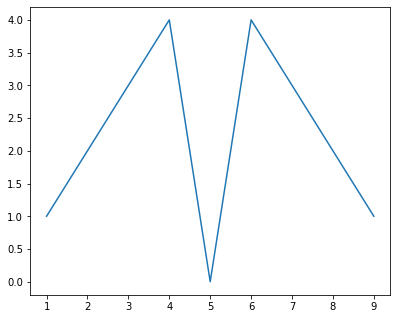

In [56]:
x= range(1,10)
y= [1,2,3,4,0,4,3,2,1]

fig= plt.figure() #To print blank figure
ax= fig.add_axes([.1,1,1,1]) #To add figure axes

ax.plot(x,y) #To plot it out

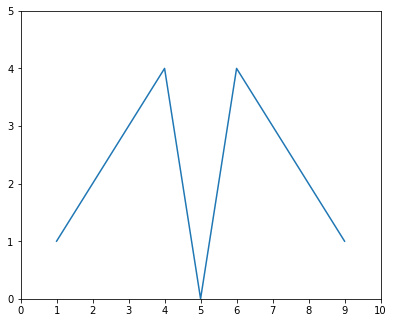

In [57]:
#Setting limits and adding ticks marks to axes

fig= plt.figure() #To print blank figure
ax= fig.add_axes([.1,1,1,1]) #To add figure axes

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax.set_yticks([0,1,2,3,4,5])

ax.plot(x,y)

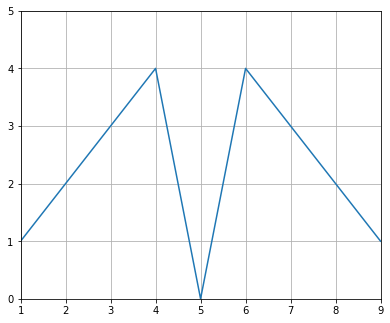

In [58]:
# To print plot with grid
fig= plt.figure() #To print blank figure
ax= fig.add_axes([.1,1,1,1]) #To add figure axes

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.grid()
ax.plot(x,y)

# Generating multiple plots in one figure with subplots

<Figure size 360x288 with 0 Axes>

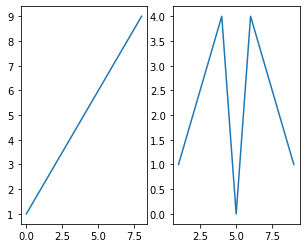

In [59]:
fig= plt.figure()
fig, (ax1,ax2) = plt.subplots(1,2) #👈 الارقام دي تدل على عدد الاعمدة والصفوف واللي هانعملها(هنا صف واحد وعمودين )

ax1.plot(x)
ax2.plot(x,y)

# Defining plot color

<BarContainer object of 9 artists>

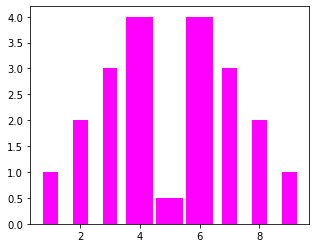

In [60]:
x= range(1,10)
y= [1,2,3,4,.5,4,3,2,1]

wide = [.5,.5,.5,.9,.9,.9,.5,.5,.5]
color= ['fuchsia']

plt.bar(x,y, width= wide, color = color, align='center')

<AxesSubplot:>

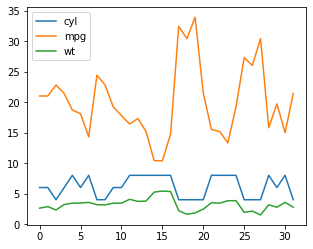

In [61]:
df= cars[['cyl','mpg','wt']]
df.plot()

<AxesSubplot:>

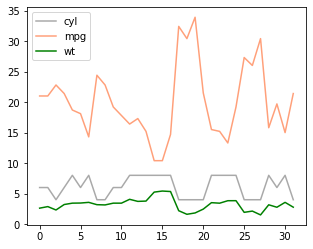

In [62]:
color_theme=['darkgray','lightsalmon','green']
df.plot(color=color_theme)

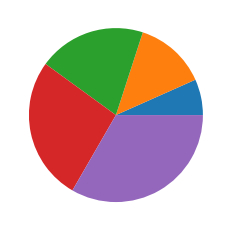

In [63]:
z=[1,2,3,4,5]
plt.pie(z)
plt.show()

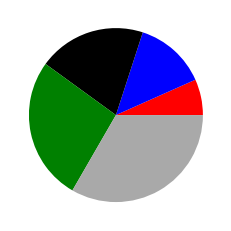

In [64]:
colour_theme= ['red','blue','black','green','#A9A9A9']
plt.pie(z, colors=colour_theme)
plt.show()

# Customizing line style

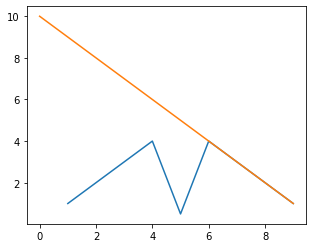

In [65]:
x1= range(0,10)
y1= [10,9,8,7,6,5,4,3,2,1]

plt.plot(x,y)
plt.plot(x1,y1)

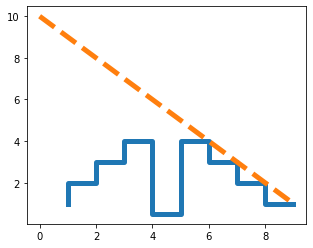

In [66]:
plt.plot(x,y, ds='steps', lw=5)
plt.plot(x1,y1, ls='--', lw=5)

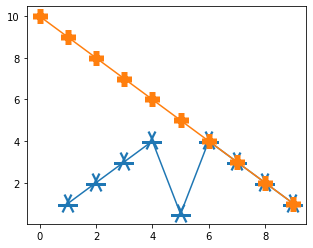

In [67]:
plt.plot(x,y, marker = '1', mew= 20)
plt.plot(x1,y1, marker= '+', mew= 15)

# Segment 4 : Creating labels and annotations

# Labeling plot features 

# The functional method

Text(0, 0.5, 'I am your y-axis')

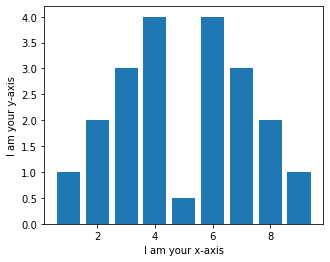

In [68]:
x=range(1,10)
y=[1,2,3,4,.5,4,3,2,1]
plt.bar(x,y)

plt.xlabel('I am your x-axis')
plt.ylabel('I am your y-axis')


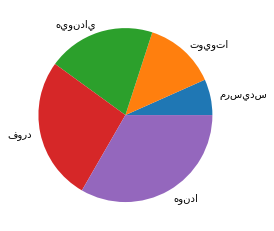

In [69]:
z=[1,2,3,4,5]
veh_type=['مرسيدس','تويوتا','هيونداي','فورد','هوندا']
plt.pie(z, labels=veh_type)
plt.show()

# The object oriented method

Text(0, 0.5, 'miles/gallon')

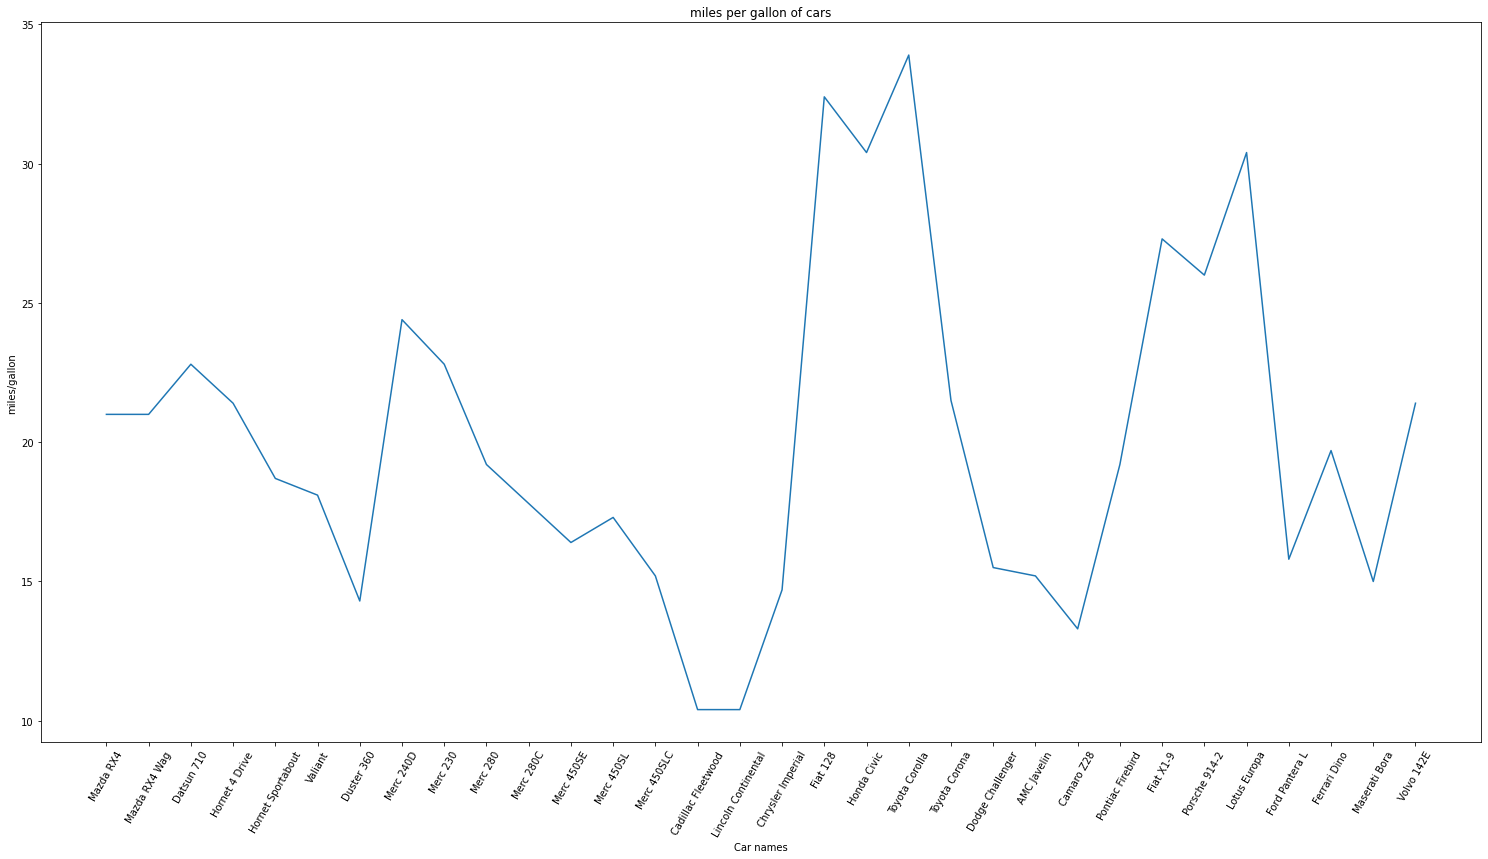

In [70]:

fig= plt.figure(figsize=(20,10))
ax=fig.add_axes([.1,.1,1,1])
cars.mpg.plot() # you can use cars.mpg or cars['mpg'], also this command should be before the following commands so the data labels will be rotated to be visible.

ax.set_xticks(range(32))

ax.set_xticklabels(cars.Car_names, rotation=60, fontsize= 'medium')
ax.set_title('miles per gallon of cars')

ax.set_xlabel('Car names')
ax.set_ylabel('miles/gallon')


# Adding legend to your plot

# The functional method

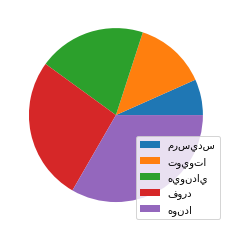

In [71]:
plt.pie(z)
plt.legend(veh_type, loc='best')
plt.show()

# The object-oriented method

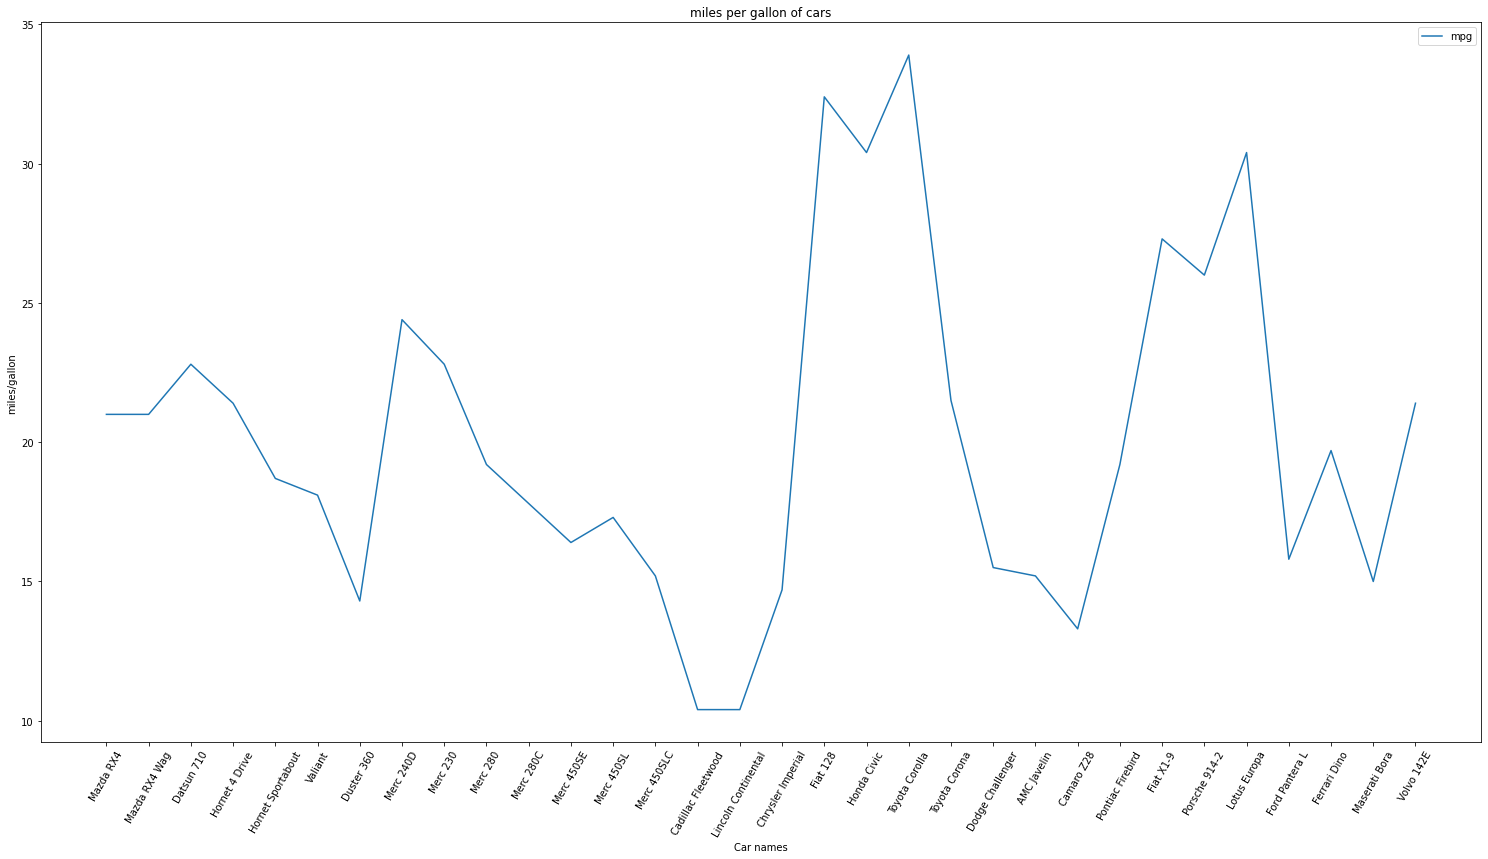

In [72]:
fig= plt.figure(figsize=(20,10))
ax=fig.add_axes([.1,.1,1,1])
cars.mpg.plot() # you can use cars.mpg or cars['mpg'], also this command should be before the following commands so the data labels will be rotated to be visible.

ax.set_xticks(range(32))

ax.set_xticklabels(cars.Car_names, rotation=60, fontsize= 'medium')
ax.set_title('miles per gallon of cars')

ax.set_xlabel('Car names')
ax.set_ylabel('miles/gallon')

ax.legend(loc='best')

# Annotating your plot

In [73]:
cars.mpg.max()

33.9

Text(21, 35, 'Toyota Corolla')

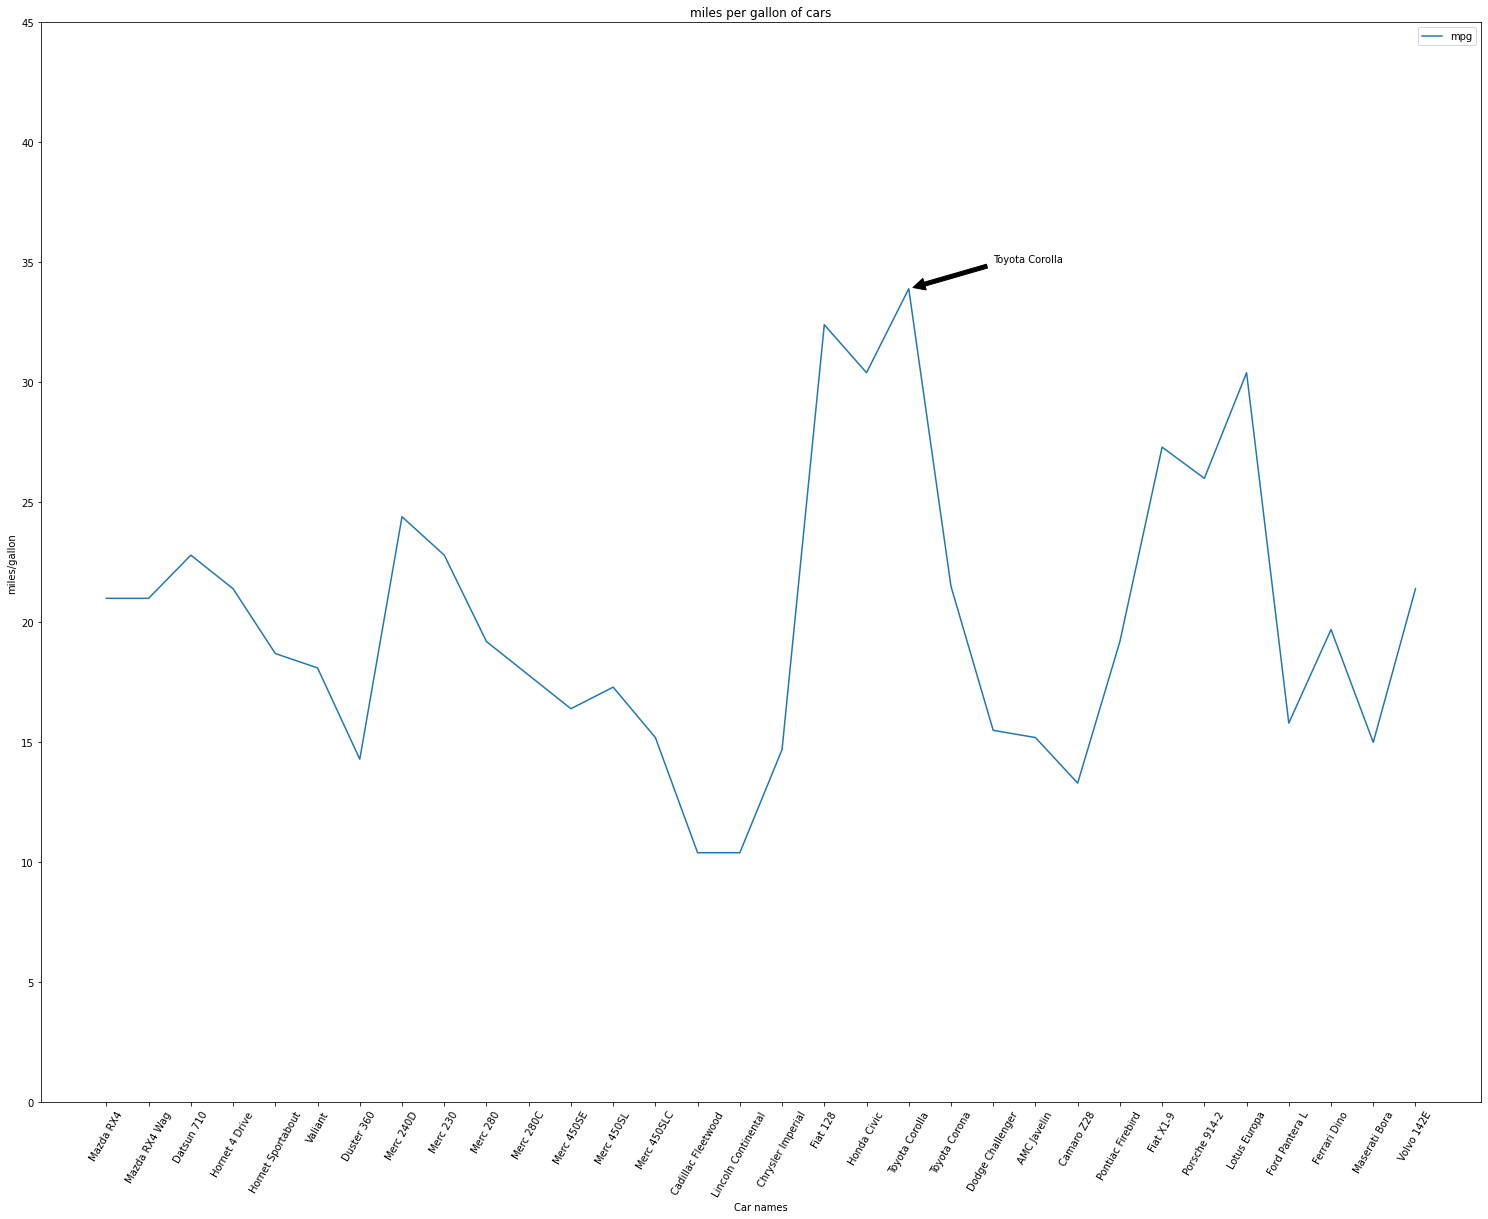

In [74]:
fig= plt.figure(figsize=(20,15))
ax=fig.add_axes([.1,.1,1,1])
cars.mpg.plot() # you can use cars.mpg or cars['mpg'], also this command should be before the following commands so the data labels will be rotated to be visible.

ax.set_xticks(range(32))

ax.set_xticklabels(cars.Car_names, rotation=60, fontsize= 'medium')
ax.set_title('miles per gallon of cars')

ax.set_xlabel('Car names')
ax.set_ylabel('miles/gallon')

ax.legend(loc='best') # 👈 To add legend to the chart.

ax.set_ylim([0,45])
ax.annotate('Toyota Corolla', xy=(19,33.9),xytext=(21,35), arrowprops=dict(facecolor='black',shrink=0.05))

# Sigment 5 : Visualizing time series

# The simplest time series plot

In [75]:
from numpy.random import randn
address='https://docs.google.com/spreadsheets/d/e/2PACX-1vSn4w16hn9_C81TjdoHdnnxNo4kGtNrqm_wti4K5_gd3hD00z4rFBrYWesJLzEBrX-8wMi_8p5tTj3q/pub?output=csv'
df=pd.read_csv(address, index_col='Order Date', parse_dates=True) # ترتيب الداتا ليكون التاريخ أول عمود
df.head(5)

,Row ID,Order ID,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Order Date,,,,,,,,,,,,,,,,,,,,
2010-10-13,1,3,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
2012-10-01,49,293,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2012-10-01,50,293,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
2011-07-10,80,483,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
2010-08-28,85,515,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


<AxesSubplot:xlabel='Order Date'>

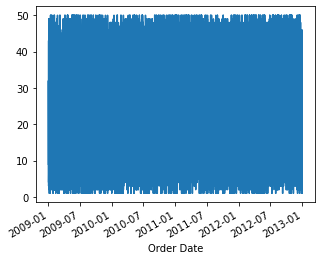

In [76]:
df['Order Quantity'].plot()
# زي ما احنا شايفين الداتا غير واضحة لانها كتيرة ، فهناخد منها عينة عشوائية في الخطوة التالية

<AxesSubplot:title={'center':'Super Store Sales'}, xlabel='Order Date', ylabel='Order Quantity'>

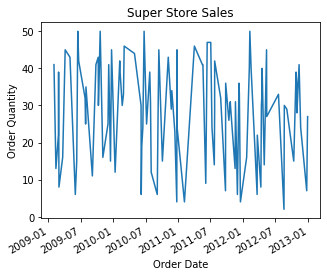

In [77]:
df2= df.sample(n=100, random_state=25, axis=0)  #لأخذ عينة عشوائية من الداتا
plt.xlabel('Order Date')
plt.ylabel('Order Quantity')
plt.title('Super Store Sales')

df2['Order Quantity'].plot()

# Segment 6 : Creating Statistical Data graphics

In [78]:
import seaborn as sb
sb.set_style('whitegrid')

# Eyeballing dataset distribution with histogram

<AxesSubplot:ylabel='Frequency'>

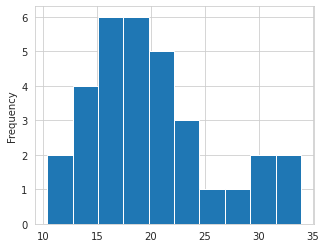

In [79]:
# We will work on metCars data which previously imported
cars.index=cars.Car_names
mpg= cars['mpg']
mpg.plot(kind='hist')

# Another way to create histogram

[]

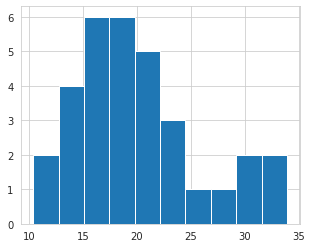

In [80]:
plt.hist(mpg)
plt.plot()

# Creating histogram with seaborn library

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

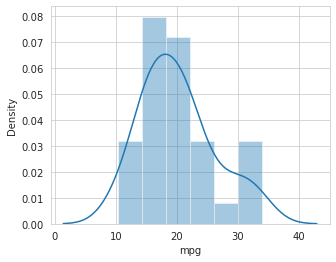

In [81]:
sb.distplot(mpg)

# Seeing scatterplots in action

<AxesSubplot:xlabel='hp', ylabel='mpg'>

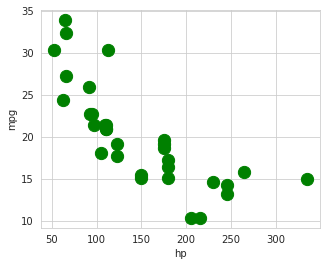

In [82]:
cars.plot(kind='scatter', x='hp', y='mpg', c=['green'], s=150)  #c=color, s=size

<AxesSubplot:xlabel='hp', ylabel='mpg'>

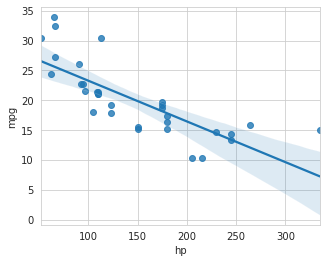

In [83]:
sb.regplot(x='hp', y='mpg', data=cars, scatter=True)

# Generating a scatterplot matrix (using seaborn)

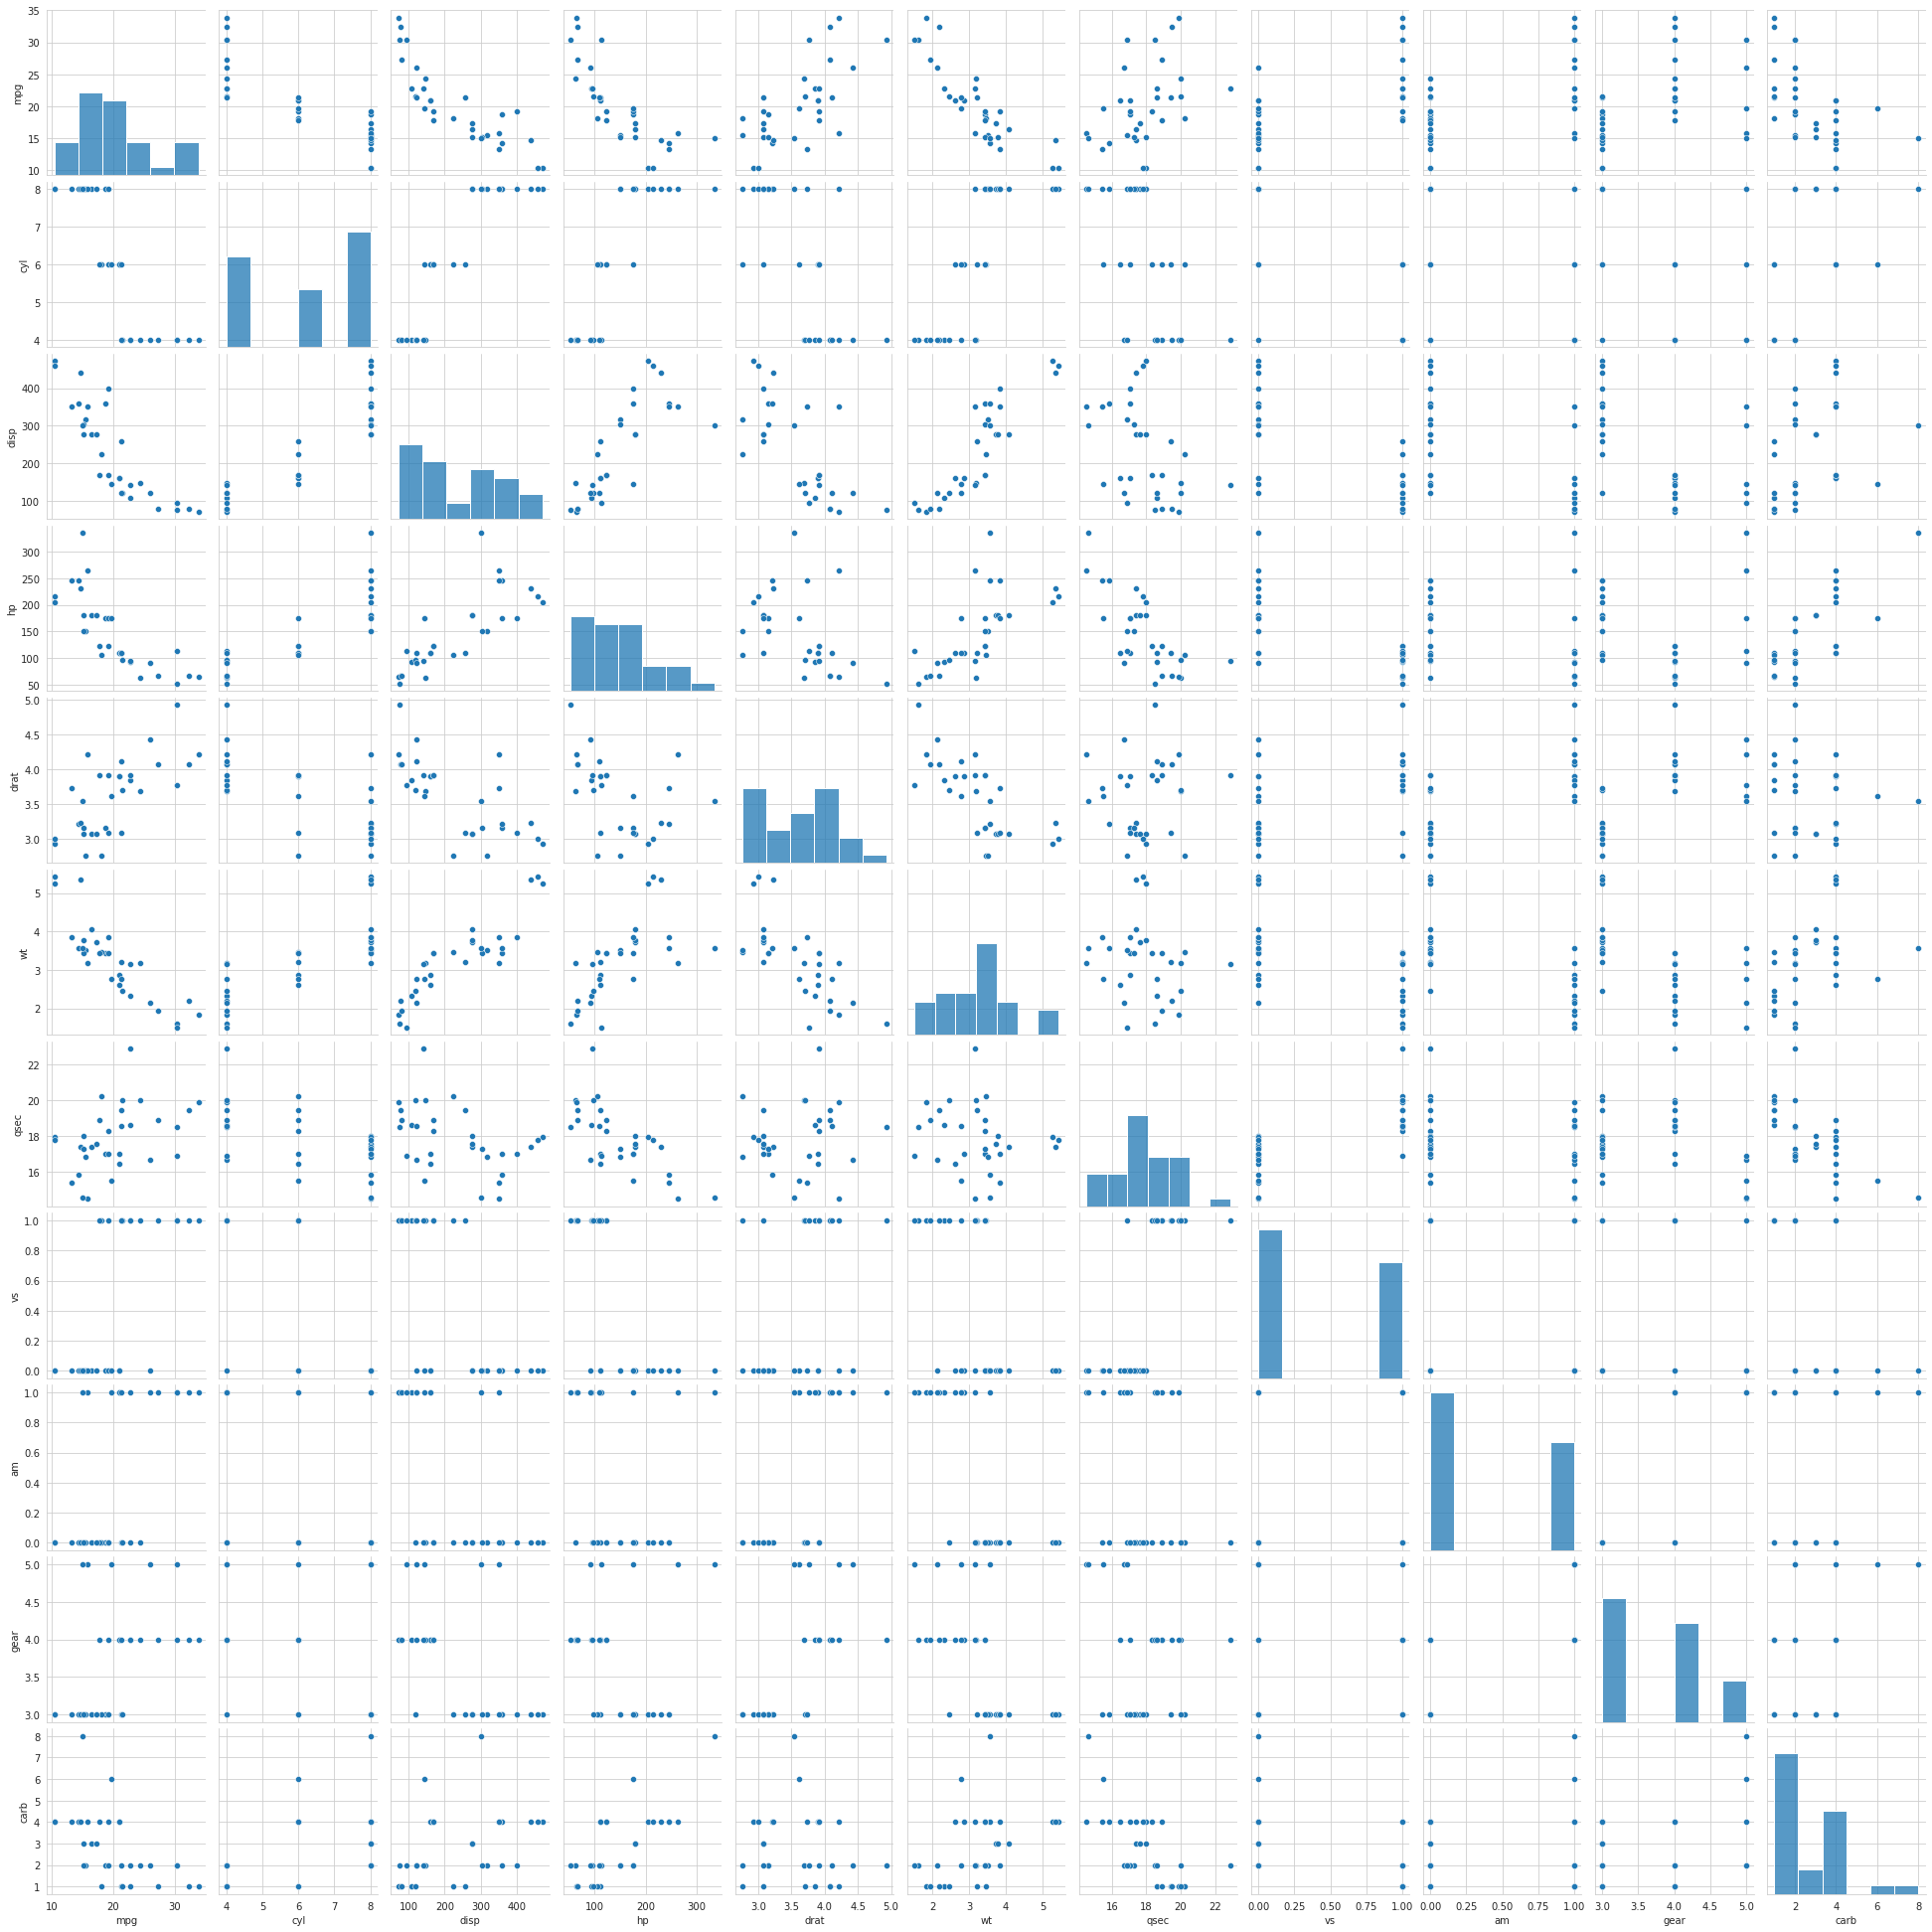

In [84]:
sb.pairplot(cars)

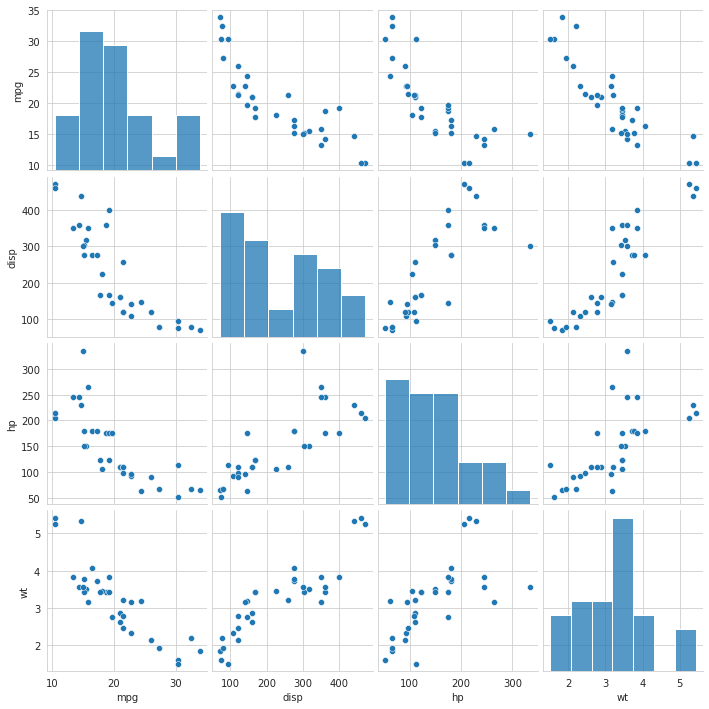

In [85]:
#To better see the correlated columns
cars_subset=cars[['mpg','disp','hp','wt']]
sb.pairplot(cars_subset)

# Building boxplots

<AxesSubplot:title={'center':'wt'}, xlabel='am'>

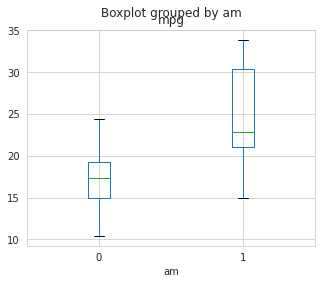

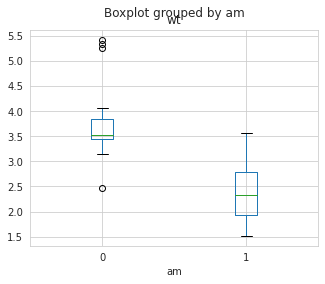

In [86]:
cars.boxplot(column='mpg', by='am')
cars.boxplot(column='wt', by='am')

# Boxplots using seaborn library

<AxesSubplot:xlabel='am', ylabel='mpg'>

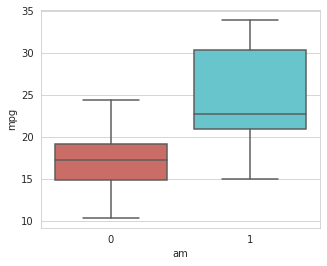

In [87]:
sb.boxplot(x='am', y='mpg', data=cars, palette='hls')

# Chapter 5: Basic Math & Statistics

# Segment 1: Using Numpy to perform arithmetic operations on data 

In [91]:
import numpy as np
from numpy.random import randn

In [92]:
np.set_printoptions(precision=2) # 👈 To make only 2 decimal points.

# Creating arrays

# Creating arrays using a list

In [106]:
a=np.array([1,2,3,4,5,6])
a

array([1, 2, 3, 4, 5, 6])

In [95]:
#Creating a matrix
b= np.array([[10,20,30],[40,50,60]])
b

array([[10, 20, 30],
       [40, 50, 60]])

# Creating arrays via assignment

In [96]:
# Generating random numbers using .randn method in numpy
np.random.seed(25)  # necessary, you put the same numbers on your machine
c= 36*np.random.randn(6)
c

array([  8.22,  36.97, -30.23, -21.28, -34.45,  -8.  ])

In [98]:
d= np.arange(1,35) # you must write the start and the end number( this will print from the start to the number before the end number)
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

# Performic arithemic on arrays

In [107]:
a*10

array([10, 20, 30, 40, 50, 60])

In [108]:
c+a

array([  9.22,  38.97, -27.23, -17.28, -29.45,  -2.  ])

In [110]:
c-a

array([  7.22,  34.97, -33.23, -25.28, -39.45, -14.  ])

In [111]:
c*a

array([   8.22,   73.94,  -90.68,  -85.13, -172.24,  -48.02])

In [113]:
c/a

array([  8.22,  18.48, -10.08,  -5.32,  -6.89,  -1.33])

# Segment 2: Multipying matrices and basic linear algebra

# Multiplying matrices & basic linear algebra

In [114]:
aa= np.array([[2.,4.,6.],[1.,3.,5.],[10.,20.,30.]])
aa

array([[ 2.,  4.,  6.],
       [ 1.,  3.,  5.],
       [10., 20., 30.]])

In [ ]:
aa= np.array([[1.,2.,6.],[1.,3.,5.],[10.,20.,30.]])